### Ensemble methods

Ensemble techniques use a combination of multiple models to make one big model.  

Often the aggregated model is "smarter" than any individual model.

Imagine 1000 models that are each right 51% of the time.

Each model is "weak".  

But if each model is wrong **independently** of the others, the *mode* prediction is almost certainly correct.

However if the models are correlated then the mode prediction may be just as bad as the constituent models.

---

#### Random forest

One particularly powerful example is the "random forest".

This approach seeks to create a diverse set of decision trees.

The models are given slightly different features and data to increase the diversity.

Then they all "vote" and collectively their predictions tend to yield good results.

---



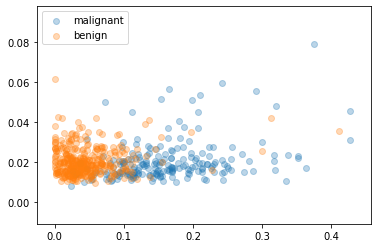

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


###

D = np.loadtxt(open("num_data.txt", "rb"), delimiter=",", skiprows=0)


x  = D[:,8]
y  = D[:,20]

malignant = D[:,1]==1  ## Column 1 represents benign (0) or malignant (1)


xm = x[malignant]
ym = y[malignant]

benign = D[:,1]==0
xb = x[benign]
yb = y[benign]

plt.scatter(xm,ym,label="malignant",alpha=0.3)
plt.scatter(xb,yb,label="benign",alpha=0.3)

plt.legend()
plt.show()

In [90]:
X = np.ones(D.shape[0]*3).reshape(D.shape[0],3)
X[:,1] = D[:,20]
X[:,2] = D[:,8]
X = StandardScaler().fit_transform(X)
malignant = D[:,1]==1  ## Column 1 represents benign (0) or malignant (1)
y = 2*malignant -1  # so that y in {-1,1}, not {0,1}


In [91]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

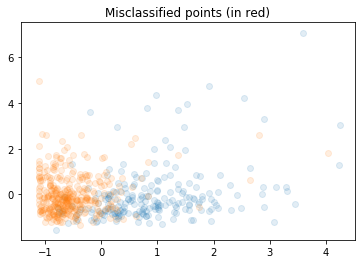

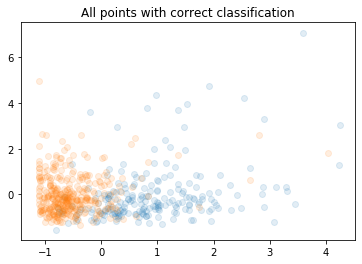

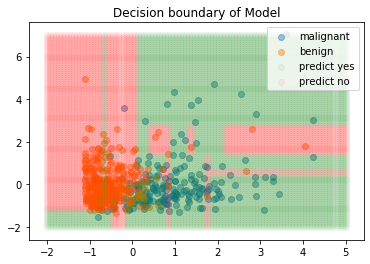

In [92]:

def bc_predict(model,X,y,xl=-2,xr=5,yl=-2,yr=7):
    g = model.predict(X)

    xm = X[:,X.shape[1]-1][malignant]
    ym = X[:,X.shape[1]-2][malignant]

    xb = X[:,X.shape[1]-1][benign]
    yb = X[:,X.shape[1]-2][benign]


    plt.scatter(xm,ym,label="malignant",alpha=0.13)
    plt.scatter(xb,yb,label="benign",alpha=0.13)
    plt.title("Misclassified points (in red)")
    plt.scatter(X[g!=y][:,X.shape[1]-1],X[g!=y][:,X.shape[1]-2],c='red',alpha=0.2)
    plt.show()
    plt.title("All points with correct classification")
    plt.scatter(xm,ym,label="malignant",alpha=0.13)
    plt.scatter(xb,yb,label="benign",alpha=0.13)

    plt.show()
    num = 100
    xc = np.linspace(xl,xr,num)
    yc = np.linspace(yl,yr,num)
    cart_prod = np.transpose([np.tile(xc, len(yc)), np.repeat(yc, len(xc))])
    if X.shape[1]==2:
        Xc = np.c_[cart_prod[:,1],cart_prod[:,0]]
    else:
        Xc = np.c_[np.ones(len(cart_prod)),cart_prod[:,1],cart_prod[:,0]]
    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)
    #Xc = scaler.transform(Xc)
    #X,Xc = scaler(X,Xc)

    #gc = predict_all(Xc,w,regression)
    gc = model.predict(Xc)

    says_yeah = gc == 1
    says_no = ~says_yeah


    plt.title("Decision boundary of Model")
    plt.scatter(xm,ym,label="malignant",alpha=0.43)
    plt.scatter(xb,yb,label="benign",alpha=0.43)
    plt.scatter(cart_prod[says_yeah][:,0],cart_prod[says_yeah][:,1],label="predict yes",alpha=0.05,color='g')
    plt.scatter(cart_prod[says_no][:,0],cart_prod[says_no][:,1],label="predict no",alpha=0.05,color='r')

    plt.legend()
    plt.show()

bc_predict(model,X,y)

In [93]:
from sklearn.model_selection import train_test_split

X = np.ones(D.shape[0]*2).reshape(D.shape[0],2)
X[:,0] = D[:,20]
X[:,1] = D[:,8]
malignant = D[:,1]==1  ## Column 1 represents benign (0) or malignant (1)
y = 2*malignant -1  # so that y in {-1,1}, not {0,1}

X_train,X_test,y_train,y_test = train_test_split(X,y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [94]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

In [95]:
model.score(X_test,y_test)

0.7972027972027972

In [96]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
X_train.shape[1]

2

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth':[3,6,9],'max_features':[1,2],'min_weight_fraction_leaf':[0,.1,.2,.3]}]


grid_search = GridSearchCV(model,param_grid,cv=5)

grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [3, 6, 9], 'max_features': [1, 2],
    

In [99]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 2, 'min_weight_fraction_leaf': 0.1}

In [100]:
model = grid_search.best_estimator_

model.score(X_test,y_test)

0.8811188811188811

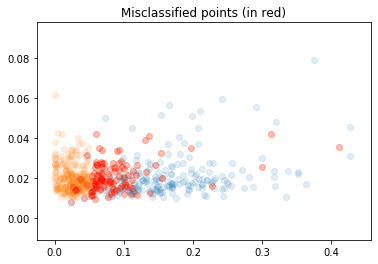

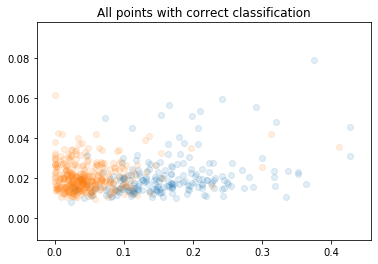

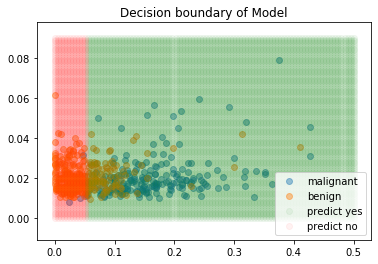

In [101]:
bc_predict(model,X,y,0,.5,0,.09)


In [102]:
from sklearn.tree import export_graphviz

export_graphviz(
        model,
        out_file="bc.dot",
        feature_names=['x1','x2'],
        class_names=['m','b'],
        rounded=True,
        filled=True
    )

In [103]:
!dot -Tpng bc.dot -o bc.png

![img](bc.png)

In [104]:
col_names = ["ID","Diagnosis","mean_radius","std_err_radius","worst_radius",
            "mean_texture","std_err_texture","worst_texture",
            "mean_perimeter","std_err_perimeter","worst_perimeter",
            "mean_area","std_err_area","worst_area",
            "mean_smoothness","std_err_smoothness","worst_smoothness",
            "mean_compactness","std_err_compactness","worst_compactness",
            "mean_concavity","std_err_concavity","worst_concavity",
            "mean_concave_pts","std_err_concave_pts","worst_concave_pts",
            "mean_symmetry","std_err_symmetry","worst_symmetry",
            "mean_fractal_dim","std_err_fractal_dim","worst_fractal_dim"]
X = np.copy(D[:,2:])
y = 2*D[:,1] -1  # so that y in {-1,1}, not {0,1}

names = col_names[2:]
X.shape[1],len(names)

(30, 30)

In [105]:

X_train,X_test,y_train,y_test = train_test_split(X,y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [106]:
model = DecisionTreeClassifier()

param_grid = [{'max_depth':[3,9,25],'max_features':[1,8,16,30],'min_weight_fraction_leaf':[0,.03,.1,.2]}]


grid_search = GridSearchCV(model,param_grid,cv=5)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [3, 9, 25],
                          '

In [107]:
grid_search.best_params_


{'max_depth': 25, 'max_features': 30, 'min_weight_fraction_leaf': 0}

In [108]:
model = grid_search.best_estimator_
model.fit(X,y)
export_graphviz(
        model,
        out_file="bc_full3.dot",
        feature_names=names,
        class_names=['b','m'],
        rounded=True,
        filled=True
    )

In [109]:
!dot -Tpng bc_full3.dot -o bc_full3.png

![img](bc_full3.png)

In [110]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.916083916083916

In [111]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=4),max_features=0.6,n_estimators=1000,max_samples=300,bootstrap=True,n_jobs=-1,oob_score = True)
bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.951048951048951

In [112]:
### OOB is pretty close to test error, without using test set.
### Can use this as a kind of cross-validation

bag_clf.oob_score_

0.9553990610328639

In [113]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9440559440559441

In [114]:
## This is equivalent to the random forest classifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes=16,splitter="random"),n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1,oob_score = True)
bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.951048951048951

In [115]:
best_features = []
for nm,score in zip(names,rf.feature_importances_):
    best_features.append((nm,score))

In [116]:
best_features.sort(key=lambda x:x[1],reverse=True)

In [117]:
best_features

[('std_err_concave_pts', 0.18220802202944764),
 ('worst_concave_pts', 0.1316207529061084),
 ('mean_fractal_dim', 0.11285732156134179),
 ('worst_concavity', 0.09645242396675695),
 ('std_err_perimeter', 0.0757811495336089),
 ('mean_radius', 0.0596122287876792),
 ('worst_radius', 0.056108054829240785),
 ('mean_texture', 0.044225416002187205),
 ('mean_perimeter', 0.040939549614924055),
 ('std_err_smoothness', 0.023298339478817737),
 ('worst_symmetry', 0.022869282741510046),
 ('mean_concave_pts', 0.021354019071255625),
 ('mean_smoothness', 0.014524231694099096),
 ('std_err_radius', 0.013501399284253026),
 ('std_err_area', 0.012159206328667085),
 ('std_err_symmetry', 0.011719575283667101),
 ('mean_symmetry', 0.009860783507295022),
 ('worst_fractal_dim', 0.009445216316412465),
 ('worst_texture', 0.008794220890269003),
 ('std_err_fractal_dim', 0.007931268844919268),
 ('worst_perimeter', 0.00595044159453993),
 ('std_err_concavity', 0.005584038918306733),
 ('worst_compactness', 0.005114620317618

### Boosting

(see Hands on Machine Learning by Geron 1st ed, ch. 7)

Boosting is an ensemble method that tries to combine many weak learners into a strong learner.

Usually the ensemble is not independently drawn as in the case of bagging or a random forest.

Rather each subsequent "tree" in the forest is chosen to correct the failings of the previous trees. 

We will discuss two main approaches:

* Adaboost
* Gradient Boost

### Adaboost

Adaboost outputs a series of hypotheses.

Each hypothesis has been constructed to correct the mistakes of its predecessors.

Instances that are persistently misclassified acquire higher and higher weight.

Each hypothesis in the ensemble is also weighted according to its weighted accuracy.

In the final prediction the hypotheses have a weighted vote.

![img](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1700%2F0*paPv7vXuq4eBHZY7.png&f=1&nofb=1)



In [118]:
# Code stolen from here:
#https://stats.stackexchange.com/questions/157220/how-to-use-decision-stump-as-weak-learner-in-adaboost#157756

# input: dataset X and labels y (in {+1, -1})

def adaboost(X,y,num_iterations=500):
    hypotheses = []
    hypothesis_weights = []

    N = X.shape[0]
    d = np.ones(N) / N

    for t in range(num_iterations):
        h = DecisionTreeClassifier(max_depth=1)

        h.fit(X, y, sample_weight=d)
        pred = h.predict(X)

        eps = d.dot(pred != y)
        alpha = (np.log(1 - eps) - np.log(eps)) / 2

        d = d * np.exp(- alpha * y * pred)
        d = d / d.sum()

        hypotheses.append(h)
        hypothesis_weights.append(alpha)
    return hypotheses,hypothesis_weights

def adapredict(X,hypotheses,hypotheses_weight):
    N = X.shape[0]
    y = np.zeros(N)
    for (h, alpha) in zip(hypotheses, hypotheses_weight):
        y = y + alpha * h.predict(X)
    y = np.sign(y)    
    return y
    
h,hw = adaboost(X_train,y_train)
y_train_hat = adapredict(X_train,h,hw)
y_test_hat = adapredict(X_test,h,hw)
print("Train error: {}".format(np.mean(y_train_hat != y_train)))
print("Test error: {}".format(np.mean(y_test_hat != y_test)))
print("Test accuracy: {}".format(np.mean(y_test_hat == y_test)))

Train error: 0.0
Test error: 0.03496503496503497
Test accuracy: 0.965034965034965


In [127]:

### In this code we remember the old weight vectors for the training data
### We'll observe how they change

def adaboost_dbg(X,y,num_iterations=500):
    hypotheses = []
    hypothesis_weights = []
    D = []
    N = X.shape[0]
    d = np.ones(N) / N
    
    for t in range(num_iterations):
        D.append(d)
        h = DecisionTreeClassifier(max_depth=1)

        h.fit(X, y, sample_weight=d)
        pred = h.predict(X)

        eps = d.dot(pred != y)
        alpha = (np.log(1 - eps) - np.log(eps)) / 2

        d = d * np.exp(- alpha * y * pred)
        d = d / d.sum()

        hypotheses.append(h)
        hypothesis_weights.append(alpha)
    return hypotheses,hypothesis_weights,D


In [128]:
h,hw,D = adaboost_dbg(X_train,y_train,num_iterations=5)
y_train_hat = adapredict(X_train,h,hw)
y_test_hat = adapredict(X_test,h,hw)
print("Train error: {}".format(np.mean(y_train_hat != y_train)))
print("Test error: {}".format(np.mean(y_test_hat != y_test)))
print("Test accuracy: {}".format(np.mean(y_test_hat == y_test)))



Train error: 0.025821596244131457
Test error: 0.06293706293706294
Test accuracy: 0.9370629370629371


In [143]:
### Train on a small amount of data so we can study how it works.

### Look at this crazy accuracy for 5 iterations and 75 training points!

h,hw,D = adaboost_dbg(X_train[:75],y_train[:75],num_iterations=5)
y_train_hat = adapredict(X_train,h,hw)
y_test_hat = adapredict(X_test,h,hw)
print("Train error: {}".format(np.mean(y_train_hat != y_train)))
print("Test error: {}".format(np.mean(y_test_hat != y_test)))
print("Test accuracy: {}".format(np.mean(y_test_hat == y_test)))



Train error: 0.08215962441314555
Test error: 0.11188811188811189
Test accuracy: 0.8881118881118881


Stump 0


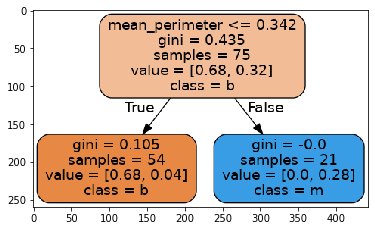

Weighted data:
[[0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]
 [0.01333333 0.01333333 0.01333333 0.01333333 0.01333333]]
Misclassifications:
[[False False False False False]
 [False False False False False]
 [False False False False Fa

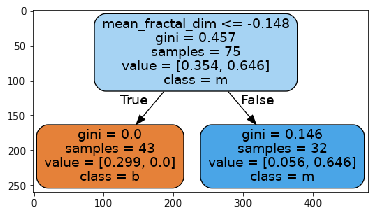

Weighted data:
[[0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.16666667 0.00694444 0.00694444 0.00694444]
 [0.00694444 0.00694444 0.16666667 0.00694444 0.00694444]
 [0.16666667 0.00694444 0.00694444 0.00694444 0.00694444]]
Misclassifications:
[[False False False False False]
 [False False False False False]
 [False False False False Fa

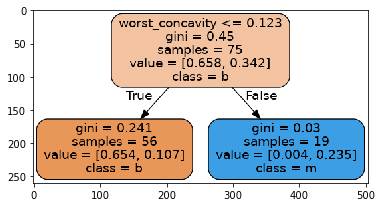

Weighted data:
[[0.00367647 0.00367647 0.00367647 0.00367647 0.00367647]
 [0.00367647 0.00367647 0.00367647 0.00367647 0.00367647]
 [0.00367647 0.00367647 0.00367647 0.00367647 0.00367647]
 [0.00367647 0.00367647 0.00367647 0.00367647 0.00367647]
 [0.0625     0.00367647 0.00367647 0.00367647 0.00367647]
 [0.00367647 0.00367647 0.00367647 0.00367647 0.00367647]
 [0.0625     0.00367647 0.0625     0.00367647 0.00367647]
 [0.00367647 0.00367647 0.00367647 0.00367647 0.0625    ]
 [0.00367647 0.00367647 0.00367647 0.00367647 0.00367647]
 [0.00367647 0.00367647 0.00367647 0.00367647 0.0625    ]
 [0.0625     0.00367647 0.00367647 0.00367647 0.00367647]
 [0.00367647 0.00367647 0.00367647 0.0625     0.00367647]
 [0.00367647 0.08823529 0.00367647 0.00367647 0.00367647]
 [0.0625     0.00367647 0.08823529 0.00367647 0.00367647]
 [0.08823529 0.00367647 0.00367647 0.00367647 0.00367647]]
Misclassifications:
[[False False False False False]
 [False False False False False]
 [ True False  True  True Fa

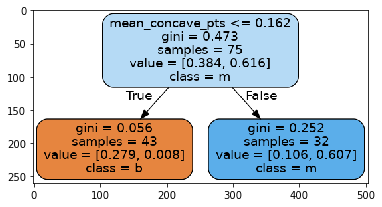

Weighted data:
[[0.00206612 0.00206612 0.00206612 0.00206612 0.00206612]
 [0.00206612 0.00206612 0.00206612 0.00206612 0.00206612]
 [0.01666667 0.00206612 0.01666667 0.01666667 0.00206612]
 [0.00206612 0.00206612 0.00206612 0.00206612 0.00206612]
 [0.03512397 0.00206612 0.01666667 0.00206612 0.00206612]
 [0.00206612 0.00206612 0.00206612 0.00206612 0.00206612]
 [0.03512397 0.00206612 0.03512397 0.00206612 0.00206612]
 [0.00206612 0.00206612 0.00206612 0.00206612 0.03512397]
 [0.00206612 0.00206612 0.00206612 0.00206612 0.00206612]
 [0.00206612 0.00206612 0.00206612 0.01666667 0.03512397]
 [0.03512397 0.00206612 0.00206612 0.00206612 0.00206612]
 [0.00206612 0.00206612 0.00206612 0.03512397 0.00206612]
 [0.00206612 0.4        0.00206612 0.00206612 0.00206612]
 [0.03512397 0.00206612 0.04958678 0.00206612 0.00206612]
 [0.04958678 0.01666667 0.00206612 0.00206612 0.00206612]]
Misclassifications:
[[False False False False False]
 [False False False False False]
 [False False False False Fa

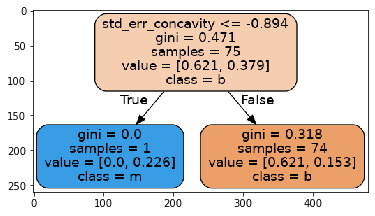

Weighted data:
[[0.00116568 0.00116568 0.00116568 0.00116568 0.00116568]
 [0.00116568 0.00116568 0.00116568 0.00116568 0.00116568]
 [0.00940317 0.00116568 0.00940317 0.00940317 0.00116568]
 [0.00116568 0.00116568 0.00116568 0.00116568 0.00116568]
 [0.0198166  0.00116568 0.00940317 0.0090799  0.00116568]
 [0.00116568 0.00116568 0.00116568 0.00116568 0.0090799 ]
 [0.0198166  0.00116568 0.0198166  0.0090799  0.0090799 ]
 [0.00116568 0.0090799  0.00116568 0.00116568 0.15435835]
 [0.00116568 0.00116568 0.0090799  0.00116568 0.0090799 ]
 [0.00116568 0.00116568 0.00116568 0.00940317 0.0198166 ]
 [0.0198166  0.0090799  0.00116568 0.0090799  0.00116568]
 [0.00116568 0.00116568 0.0090799  0.0198166  0.00116568]
 [0.0090799  0.2256761  0.00116568 0.00116568 0.00116568]
 [0.15435835 0.00116568 0.02797638 0.00116568 0.0090799 ]
 [0.02797638 0.07324455 0.00116568 0.00116568 0.0090799 ]]
Misclassifications:
[[ True False False False False]
 [ True False  True False False]
 [ True False  True  True  T

In [149]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
i = 0
for hh,hhw,d in zip(h,hw,D):
    stumpname = "stump_{}".format(i)
    export_graphviz(hh,out_file="{}.dot".format(stumpname),feature_names=names,class_names=['b','m'],rounded=True,filled=True)
    !dot -Tpng {stumpname}.dot -o {stumpname}.png
    img=mpimg.imread('{}.png'.format(stumpname))
    imgplot = plt.imshow(img)
    print("Stump {}".format(i))
    plt.show()
    print("Weighted data:")
    print(d.reshape(15,5))
    print("Misclassifications:")
    yyhat = hh.predict(X_train[:75])
    print((yyhat !=y_train[:75]).reshape(15,5))
    print("Stump weight: {}".format(hhw))
    i += 1

In [119]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=500,algorithm="SAMME.R",learning_rate=0.5)
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.9440559440559441

In [120]:
best_features = []
for nm,score in zip(names,ada.feature_importances_):
    best_features.append((nm,score))
best_features.sort(key=lambda x:x[1],reverse=True)    
best_features

[('mean_compactness', 0.114),
 ('worst_symmetry', 0.09),
 ('std_err_smoothness', 0.08),
 ('std_err_radius', 0.074),
 ('mean_fractal_dim', 0.072),
 ('mean_symmetry', 0.054),
 ('worst_compactness', 0.052),
 ('mean_concave_pts', 0.05),
 ('worst_texture', 0.046),
 ('worst_concavity', 0.042),
 ('mean_texture', 0.036),
 ('mean_smoothness', 0.036),
 ('std_err_area', 0.032),
 ('std_err_perimeter', 0.03),
 ('std_err_fractal_dim', 0.03),
 ('std_err_concave_pts', 0.028),
 ('std_err_concavity', 0.024),
 ('std_err_texture', 0.016),
 ('worst_smoothness', 0.014),
 ('worst_concave_pts', 0.014),
 ('worst_fractal_dim', 0.014),
 ('worst_perimeter', 0.012),
 ('worst_area', 0.01),
 ('mean_perimeter', 0.008),
 ('mean_area', 0.008),
 ('mean_concavity', 0.006),
 ('std_err_symmetry', 0.006),
 ('worst_radius', 0.002),
 ('mean_radius', 0.0),
 ('std_err_compactness', 0.0)]

### Gradient Boosting

This image is from Geron (https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb)


![img](geron.png)